In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

import sys

# setting path
sys.path.append('..')

from evaluation import get_time_step_fleet
from utils import load_solution

In [2]:
solution = load_solution("../data/solution_example.json")
df = get_time_step_fleet(solution=solution, ts=1)

In [3]:
df.columns

Index(['datacenter_id', 'server_generation', 'server_id', 'action'], dtype='object')

In [4]:
from utils import load_problem_data
demand, datacenters, servers, selling_prices = load_problem_data('../data')

In [5]:
demand_selected = demand[demand['time_step'] == 1]
demand_selected

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3
0,1,high,4000,0,0,0,30,0,0
168,1,medium,6000,0,0,0,10,0,0
336,1,low,10000,0,0,0,10,0,0


In [6]:
datacenters

,datacenter_id,cost_of_energy,latency_sensitivity,slots_capacity
0,DC1,0.25,low,25245
1,DC2,0.35,medium,15300
2,DC3,0.65,high,7020
3,DC4,0.75,high,8280


In [7]:
merged_servers_df = pd.merge(selling_prices, servers, on='server_generation')

# Calculate Total Revenue (assuming selling price represents revenue per time unit over life expectancy)
merged_servers_df['total_revenue'] = merged_servers_df['capacity'] * merged_servers_df['selling_price'] * merged_servers_df['life_expectancy']

# Calculate Total Costs
merged_servers_df['total_cost'] = (
    merged_servers_df['purchase_price'] +
    (merged_servers_df['average_maintenance_fee'] * merged_servers_df['life_expectancy']) +
    merged_servers_df['cost_of_moving']
)

# Calculate Profitability
merged_servers_df['profitability'] = merged_servers_df['total_revenue'] - merged_servers_df['total_cost']

# Sort by Profitability
most_profitable_servers = merged_servers_df.sort_values(by='profitability', ascending=False)

most_profitable_servers

,server_generation,latency_sensitivity,selling_price,server_type,release_time,purchase_price,slots_size,energy_consumption,capacity,life_expectancy,cost_of_moving,average_maintenance_fee,total_revenue,total_cost,profitability
20,GPU.S3,high,2700.0,GPU,"[97,168]",160000,4,4200,8,96,1000,3080,2073600.0,456680,1616920.0
13,GPU.S3,medium,2450.0,GPU,"[97,168]",160000,4,4200,8,96,1000,3080,1881600.0,456680,1424920.0
6,GPU.S3,low,2150.0,GPU,"[97,168]",160000,4,4200,8,96,1000,3080,1651200.0,456680,1194520.0
19,GPU.S2,high,2000.0,GPU,"[49,120]",140000,4,3000,8,96,1000,2695,1536000.0,399720,1136280.0
18,GPU.S1,high,1875.0,GPU,"[1,72]",120000,4,3000,8,96,1000,2310,1440000.0,342760,1097240.0
12,GPU.S2,medium,1800.0,GPU,"[49,120]",140000,4,3000,8,96,1000,2695,1382400.0,399720,982680.0
11,GPU.S1,medium,1680.0,GPU,"[1,72]",120000,4,3000,8,96,1000,2310,1290240.0,342760,947480.0
5,GPU.S2,low,1600.0,GPU,"[49,120]",140000,4,3000,8,96,1000,2695,1228800.0,399720,829080.0
4,GPU.S1,low,1500.0,GPU,"[1,72]",120000,4,3000,8,96,1000,2310,1152000.0,342760,809240.0
17,CPU.S4,high,30.0,CPU,"[109,168]",22000,2,920,160,96,1000,423,460800.0,63608,397192.0


In [8]:
most_profitable_servers.to_csv("most_profitable_servers.csv")

In [9]:
most_profitable_servers

,server_generation,latency_sensitivity,selling_price,server_type,release_time,purchase_price,slots_size,energy_consumption,capacity,life_expectancy,cost_of_moving,average_maintenance_fee,total_revenue,total_cost,profitability
20,GPU.S3,high,2700.0,GPU,"[97,168]",160000,4,4200,8,96,1000,3080,2073600.0,456680,1616920.0
13,GPU.S3,medium,2450.0,GPU,"[97,168]",160000,4,4200,8,96,1000,3080,1881600.0,456680,1424920.0
6,GPU.S3,low,2150.0,GPU,"[97,168]",160000,4,4200,8,96,1000,3080,1651200.0,456680,1194520.0
19,GPU.S2,high,2000.0,GPU,"[49,120]",140000,4,3000,8,96,1000,2695,1536000.0,399720,1136280.0
18,GPU.S1,high,1875.0,GPU,"[1,72]",120000,4,3000,8,96,1000,2310,1440000.0,342760,1097240.0
12,GPU.S2,medium,1800.0,GPU,"[49,120]",140000,4,3000,8,96,1000,2695,1382400.0,399720,982680.0
11,GPU.S1,medium,1680.0,GPU,"[1,72]",120000,4,3000,8,96,1000,2310,1290240.0,342760,947480.0
5,GPU.S2,low,1600.0,GPU,"[49,120]",140000,4,3000,8,96,1000,2695,1228800.0,399720,829080.0
4,GPU.S1,low,1500.0,GPU,"[1,72]",120000,4,3000,8,96,1000,2310,1152000.0,342760,809240.0
17,CPU.S4,high,30.0,CPU,"[109,168]",22000,2,920,160,96,1000,423,460800.0,63608,397192.0


In [10]:
demand['CPU.S1'].max()/60

11654.4

In [11]:
import uuid


def generate_random_fleet(datacenters=datacenters, servers=servers, num_servers=100, max_time_step=168):
    # Create lists of valid datacenter IDs and server generations
    datacenter_ids = datacenters['datacenter_id'].tolist()
    server_generations = servers['server_generation'].tolist()

    # Generate random data
    random_fleet = pd.DataFrame({
        'datacenter_id': np.random.choice(datacenter_ids, num_servers),
        'server_generation': np.random.choice(server_generations, num_servers),
        'server_id': [str(uuid.uuid4()) for _ in range(num_servers)],
        'time_step_of_purchase': np.random.randint(1, max_time_step + 1, num_servers)
    })

    return random_fleet

In [12]:
fleet = generate_random_fleet()
fleet

,datacenter_id,server_generation,server_id,time_step_of_purchase
0,DC3,CPU.S3,111a2708-d6a6-46fa-b3aa-5b16ac76bc6f,52
1,DC4,CPU.S1,5fd9114f-b3ad-4abe-879b-2afecb3d6ec2,143
2,DC3,GPU.S3,a5637a26-7e68-4777-9cb8-f2c525e88d69,146
3,DC3,GPU.S2,18056fbf-8721-49ce-85a7-e74dea0c0165,138
4,DC4,GPU.S1,bbf6251e-1d13-433b-bf74-62baa4c3a9a9,85
...,...,...,...,...
95,DC1,CPU.S2,7c9b7cbb-7e19-4f57-bc7c-927c4a8104df,43
96,DC1,CPU.S3,c1027763-ac92-4148-9576-619804acb2f5,146
97,DC3,GPU.S3,e69c0a04-7ded-4e83-b5cd-db93cb259e9c,92
98,DC2,CPU.S3,cb15327f-88cb-4cff-aa0e-291a05160416,51


In [13]:
server_counts = fleet.groupby(['datacenter_id', 'server_generation']).size().reset_index(name="count")
server_counts

,datacenter_id,server_generation,count
0,DC1,CPU.S1,2
1,DC1,CPU.S2,4
2,DC1,CPU.S3,6
3,DC1,CPU.S4,4
4,DC1,GPU.S1,3
5,DC1,GPU.S3,6
6,DC2,CPU.S1,3
7,DC2,CPU.S2,3
8,DC2,CPU.S3,2
9,DC2,CPU.S4,1


In [14]:
fleet.loc[fleet["datacenter_id"] == "DC4"]

,datacenter_id,server_generation,server_id,time_step_of_purchase
1,DC4,CPU.S1,5fd9114f-b3ad-4abe-879b-2afecb3d6ec2,143
4,DC4,GPU.S1,bbf6251e-1d13-433b-bf74-62baa4c3a9a9,85
13,DC4,CPU.S2,88de791c-5243-45f6-bc85-dcae13843070,110
18,DC4,GPU.S3,0caaa50d-19ca-4023-af15-e19f4a8c7e03,26
29,DC4,GPU.S1,18ddfdc9-bd2a-457b-8660-a768b2844d1c,67
30,DC4,GPU.S2,39566cca-197f-4083-bb0b-aad47cc6b72e,40
31,DC4,GPU.S1,37c505d4-a43b-4bca-b08a-eb03ace6df02,60
34,DC4,GPU.S2,7dbdabef-8558-48a8-afe6-03464b44d0e1,131
38,DC4,CPU.S2,33c1cced-3aa7-47df-ab98-f3dd03b67ff1,109
41,DC4,GPU.S3,c449dcec-8a0b-4a61-8ec3-4d574ae077a9,41


In [15]:
def get_server_ages(fleet, time_step):
    return fleet['time_step_of_purchase'].apply(lambda x: time_step - x)

In [16]:
get_server_ages(fleet, 168)

0     116
1      25
2      22
3      30
4      83
     ... 
95    125
96     22
97     76
98    117
99     88
Name: time_step_of_purchase, Length: 100, dtype: int64

In [17]:
# import pandas as pd
# from typing import List, Dict
# import uuid

# def load_and_preprocess_data():
#     # Load data
#     datacenters = pd.read_csv('../data/datacenters.csv')
#     servers = pd.read_csv('../data/servers.csv')
#     selling_prices = pd.read_csv('../data/selling_prices.csv')
#     demand = pd.read_csv('../data/demand.csv')

#     # Sort datacenters by cost_of_energy
#     datacenters = datacenters.sort_values('cost_of_energy')

#     return datacenters, servers, selling_prices, demand

# def calculate_server_profitability(servers: pd.DataFrame, selling_prices: pd.DataFrame) -> pd.DataFrame:
#     merged_servers_df = pd.merge(selling_prices, servers, on='server_generation')
    
#     merged_servers_df['total_revenue'] = (
#         merged_servers_df['capacity'] * 
#         merged_servers_df['selling_price'] * 
#         merged_servers_df['life_expectancy']
#     )
    
#     merged_servers_df['total_cost'] = (
#         merged_servers_df['purchase_price'] +
#         (merged_servers_df['average_maintenance_fee'] * merged_servers_df['life_expectancy']) +
#         merged_servers_df['cost_of_moving']
#     )
    
#     merged_servers_df['profitability'] = merged_servers_df['total_revenue'] - merged_servers_df['total_cost']
    
#     return merged_servers_df.sort_values(by='profitability', ascending=False)

# def allocate_servers(time_step: int, 
#                      demand: pd.DataFrame, 
#                      datacenters: pd.DataFrame, 
#                      servers: pd.DataFrame, 
#                      current_fleet: List[Dict]) -> List[Dict]:
#     actions = []
    
#     # Get demand for the current time step
#     current_demand = demand[demand['time_step'] == time_step].iloc[0]
    
#     # Calculate total demand across all server types and latency sensitivities
#     total_demand = sum(current_demand[col] for col in current_demand.index if col not in ['time_step', 'latency_sensitivity'])
    
#     # Calculate current capacity
#     current_capacity = sum(server['capacity'] for server in current_fleet)
    
#     if total_demand > current_capacity:
#         # We need to add more servers
#         servers_to_add = total_demand - current_capacity
        
#         for _, datacenter in datacenters.iterrows():
#             if servers_to_add <= 0:
#                 break
            
#             available_slots = datacenter['slots_capacity'] - sum(server['slots_size'] for server in current_fleet if server['datacenter_id'] == datacenter['datacenter_id'])
            
#             for _, server in servers.iterrows():
#                 if servers_to_add <= 0 or available_slots < server['slots_size']:
#                     break
                
#                 release_start, release_end = map(int, server['release_time'][1:-1].split(','))
#                 if release_start <= time_step <= release_end:
#                     # Server is available for purchase
#                     num_servers = min(servers_to_add // server['capacity'], available_slots // server['slots_size'])
                    
#                     for _ in range(num_servers):
#                         new_server = {
#                             'time_step': time_step,
#                             'datacenter_id': datacenter['datacenter_id'],
#                             'server_generation': server['server_generation'],
#                             'server_id': str(uuid.uuid4()),
#                             'action': 'buy',
#                             'capacity': server['capacity'],
#                             'slots_size': server['slots_size']
#                         }
#                         actions.append(new_server)
#                         current_fleet.append(new_server)
                        
#                         servers_to_add -= server['capacity']
#                         available_slots -= server['slots_size']
    
#     elif total_demand < current_capacity:
#         # We need to remove servers
#         servers_to_remove = current_capacity - total_demand
        
#         # Sort current fleet by datacenter cost (descending) and server age (descending)
#         current_fleet.sort(key=lambda x: (
#             -datacenters[datacenters['datacenter_id'] == x['datacenter_id']]['cost_of_energy'].iloc[0],
#             -x['time_step']
#         ))
        
#         for server in current_fleet:
#             if servers_to_remove <= 0:
#                 break
            
#             server_capacity = servers[servers['server_generation'] == server['server_generation']]['capacity'].iloc[0]
            
#             if servers_to_remove >= server_capacity:
#                 actions.append({
#                     'time_step': time_step,
#                     'datacenter_id': server['datacenter_id'],
#                     'server_generation': server['server_generation'],
#                     'server_id': server['server_id'],
#                     'action': 'dismiss'
#                 })
#                 current_fleet.remove(server)
#                 servers_to_remove -= server_capacity
    
#     return actions, current_fleet

# def run_simulation(datacenters: pd.DataFrame, 
#                    servers: pd.DataFrame, 
#                    selling_prices: pd.DataFrame, 
#                    demand: pd.DataFrame) -> List[Dict]:
#     profitable_servers = calculate_server_profitability(servers, selling_prices)
#     servers = servers.merge(profitable_servers[['server_generation', 'profitability']], on='server_generation')
#     servers = servers.sort_values('profitability', ascending=False)
    
#     all_actions = []
#     current_fleet = []
    
#     for time_step in range(1, 169):  # 168 time steps
#         actions, current_fleet = allocate_servers(time_step, demand, datacenters, servers, current_fleet)
#         all_actions.extend(actions)
    
#     return all_actions

# def main():
#     datacenters, servers, selling_prices, demand = load_and_preprocess_data()
#     solution = run_simulation(datacenters, servers, selling_prices, demand)
    
#     # Convert solution to DataFrame and save as JSON
#     solution_df = pd.DataFrame(solution)
#     solution_df.to_json('solution.json', orient='records', indent=2)

# if __name__ == "__main__":
#     main()

In [18]:
# import pandas as pd
# import numpy as np
# from typing import List, Dict
# import uuid

# def load_and_preprocess_data():
#     # Load data
#     datacenters = pd.read_csv('../data/datacenters.csv')
#     servers = pd.read_csv('../data/servers.csv')
#     selling_prices = pd.read_csv('../data/selling_prices.csv')
#     demand = pd.read_csv('../data/demand.csv')

#     # Sort datacenters by cost_of_energy
#     datacenters = datacenters.sort_values('cost_of_energy')

#     return datacenters, servers, selling_prices, demand

# def calculate_server_profitability(servers: pd.DataFrame, selling_prices: pd.DataFrame) -> pd.DataFrame:
#     merged_servers_df = pd.merge(selling_prices, servers, on='server_generation')
    
#     merged_servers_df['total_revenue'] = (
#         merged_servers_df['capacity'] * 
#         merged_servers_df['selling_price'] * 
#         merged_servers_df['life_expectancy']
#     )
    
#     merged_servers_df['total_cost'] = (
#         merged_servers_df['purchase_price'] +
#         (merged_servers_df['average_maintenance_fee'] * merged_servers_df['life_expectancy']) +
#         merged_servers_df['cost_of_moving']
#     )
    
#     merged_servers_df['profitability'] = merged_servers_df['total_revenue'] - merged_servers_df['total_cost']
    
#     return merged_servers_df.sort_values(by='profitability', ascending=False)

# def calculate_demand(current_demand: pd.Series, servers: pd.DataFrame) -> Dict[str, int]:
#     demand_dict = {}
#     for server_type in ['CPU', 'GPU']:
#         for latency in ['high', 'medium', 'low']:
#             server_gens = servers[servers['server_type'] == server_type]['server_generation'].tolist()
#             demand = sum(current_demand[gen] for gen in server_gens if gen in current_demand.index)
#             capacity = servers[servers['server_type'] == server_type]['capacity'].iloc[0]
#             demand_dict[f"{server_type}_{latency}"] = int(np.ceil(demand / capacity))
#     return demand_dict

# def allocate_servers(time_step: int, 
#                      demand: pd.DataFrame, 
#                      datacenters: pd.DataFrame, 
#                      servers: pd.DataFrame, 
#                      current_fleet: List[Dict]) -> List[Dict]:
#     actions = []
    
#     # Get demand for the current time step
#     current_demand = demand[demand['time_step'] == time_step].iloc[0]
    
#     # Calculate demand for each server type and latency sensitivity
#     demand_dict = calculate_demand(current_demand, servers)
    
#     # Calculate current capacity
#     current_capacity = {f"{server['server_type']}_{server['latency_sensitivity']}": 0 for server in current_fleet}
#     for server in current_fleet:
#         current_capacity[f"{server['server_type']}_{server['latency_sensitivity']}"] += 1
    
#     for server_type_latency, required_servers in demand_dict.items():
#         server_type, latency = server_type_latency.split('_')
#         servers_to_add = max(0, required_servers - current_capacity[server_type_latency])
#         servers_to_remove = max(0, current_capacity[server_type_latency] - required_servers)
        
#         if servers_to_add > 0:
#             # Add servers
#             for _, datacenter in datacenters[datacenters['latency_sensitivity'] == latency].iterrows():
#                 if servers_to_add <= 0:
#                     break
                
#                 available_slots = datacenter['slots_capacity'] - sum(server['slots_size'] for server in current_fleet if server['datacenter_id'] == datacenter['datacenter_id'])
                
#                 for _, server in servers[(servers['server_type'] == server_type) & (servers['profitability'] == servers['profitability'].max())].iterrows():
#                     if servers_to_add <= 0 or available_slots < server['slots_size']:
#                         break
                    
#                     release_start, release_end = map(int, server['release_time'][1:-1].split(','))
#                     if release_start <= time_step <= release_end:
#                         # Server is available for purchase
#                         num_servers = min(servers_to_add, available_slots // server['slots_size'])
                        
#                         for _ in range(num_servers):
#                             new_server = {
#                                 'time_step': time_step,
#                                 'datacenter_id': datacenter['datacenter_id'],
#                                 'server_generation': server['server_generation'],
#                                 'server_id': str(uuid.uuid4()),
#                                 'action': 'buy',
#                                 'capacity': server['capacity'],
#                                 'slots_size': server['slots_size'],
#                                 'server_type': server_type,
#                                 'latency_sensitivity': latency
#                             }
#                             actions.append(new_server)
#                             current_fleet.append(new_server)
                            
#                             servers_to_add -= 1
#                             available_slots -= server['slots_size']
        
#         elif servers_to_remove > 0:
#             # Remove servers
#             servers_to_remove_list = []
#             for server in sorted(current_fleet, key=lambda x: (x['time_step'], -servers[servers['server_generation'] == x['server_generation']]['profitability'].iloc[0])):
#                 if servers_to_remove <= 0:
#                     break
                
#                 if server['server_type'] == server_type and server['latency_sensitivity'] == latency:
#                     actions.append({
#                         'time_step': time_step,
#                         'datacenter_id': server['datacenter_id'],
#                         'server_generation': server['server_generation'],
#                         'server_id': server['server_id'],
#                         'action': 'dismiss'
#                     })
#                     servers_to_remove_list.append(server)
#                     servers_to_remove -= 1
            
#             for server in servers_to_remove_list:
#                 current_fleet.remove(server)
    
#     return actions, current_fleet

# def run_simulation(datacenters: pd.DataFrame, 
#                    servers: pd.DataFrame, 
#                    selling_prices: pd.DataFrame, 
#                    demand: pd.DataFrame) -> List[Dict]:
#     profitable_servers = calculate_server_profitability(servers, selling_prices)
#     servers = servers.merge(profitable_servers[['server_generation', 'profitability']], on='server_generation')
#     servers = servers.sort_values('profitability', ascending=False)
    
#     all_actions = []
#     current_fleet = []
    
#     for time_step in range(1, 169):  # 168 time steps
#         actions, current_fleet = allocate_servers(time_step, demand, datacenters, servers, current_fleet)
#         all_actions.extend(actions)
    
#     return all_actions

# def main():
#     datacenters, servers, selling_prices, demand = load_and_preprocess_data()
#     solution = run_simulation(datacenters, servers, selling_prices, demand)
    
#     # Convert solution to DataFrame and save as JSON
#     solution_df = pd.DataFrame(solution)
#     solution_df.to_json('solution.json', orient='records', indent=2)

# if __name__ == "__main__":
#     main()

In [19]:
import pandas as pd
import numpy as np
from typing import List, Dict, Tuple
import uuid

def load_and_preprocess_data():
    # Load data
    datacenters = pd.read_csv('../data/datacenters.csv')
    servers = pd.read_csv('../data/servers.csv')
    selling_prices = pd.read_csv('../data/selling_prices.csv')
    demand = pd.read_csv('../data/demand.csv')

    # Sort datacenters by cost_of_energy
    datacenters = datacenters.sort_values('cost_of_energy')

    return datacenters, servers, selling_prices, demand

def calculate_server_profitability(servers: pd.DataFrame, selling_prices: pd.DataFrame) -> pd.DataFrame:
    merged_servers_df = pd.merge(selling_prices, servers, on='server_generation')
    
    merged_servers_df['total_revenue'] = (
        merged_servers_df['capacity'] * 
        merged_servers_df['selling_price'] * 
        merged_servers_df['life_expectancy']
    )
    
    merged_servers_df['total_cost'] = (
        merged_servers_df['purchase_price'] +
        (merged_servers_df['average_maintenance_fee'] * merged_servers_df['life_expectancy']) +
        merged_servers_df['cost_of_moving']
    )
    
    merged_servers_df['profitability'] = merged_servers_df['total_revenue'] - merged_servers_df['total_cost']
    
    return merged_servers_df.sort_values(by='profitability', ascending=False)

def calculate_demand(current_demand: pd.Series, servers: pd.DataFrame) -> Dict[str, int]:
    demand_dict = {}
    for server_type in ['CPU', 'GPU']:
        for latency in ['high', 'medium', 'low']:
            server_gens = servers[servers['server_type'] == server_type]['server_generation'].tolist()
            demand = sum(current_demand.get(gen, 0) for gen in server_gens)
            capacity = servers[servers['server_type'] == server_type]['capacity'].iloc[0]
            demand_dict[f"{server_type}_{latency}"] = int(np.ceil(demand / capacity))
    return demand_dict

def initialize_current_capacity():
    return {f"{server_type}_{latency}": 0 
            for server_type in ['CPU', 'GPU'] 
            for latency in ['high', 'medium', 'low']}


In [20]:

# def allocate_servers(time_step: int, 
#                      demand: pd.DataFrame, 
#                      datacenters: pd.DataFrame, 
#                      servers: pd.DataFrame, 
#                      current_fleet: List[Dict]) -> List[Dict]:
#     actions = []
    
#     # Get demand for the current time step
#     current_demand = demand[demand['time_step'] == time_step].iloc[0]
    
#     # Calculate demand for each server type and latency sensitivity
#     demand_dict = calculate_demand(current_demand, servers)
    
#     # Calculate current capacity
#     current_capacity = initialize_current_capacity()
#     for server in current_fleet:
#         current_capacity[f"{server['server_type']}_{server['latency_sensitivity']}"] += 1
    
#     for server_type_latency, required_servers in demand_dict.items():
#         server_type, latency = server_type_latency.split('_')
#         servers_to_add = max(0, required_servers - current_capacity[server_type_latency])
#         servers_to_remove = max(0, current_capacity[server_type_latency] - required_servers)
        
#         if servers_to_add > 0:
#             # Add servers
#             for _, datacenter in datacenters[datacenters['latency_sensitivity'] == latency].iterrows():
#                 if servers_to_add <= 0:
#                     break
                
#                 available_slots = datacenter['slots_capacity'] - sum(server['slots_size'] for server in current_fleet if server['datacenter_id'] == datacenter['datacenter_id'])
                
#                 for _, server in servers[(servers['server_type'] == server_type) & (servers['profitability'] == servers['profitability'].max())].iterrows():
#                     if servers_to_add <= 0 or available_slots < server['slots_size']:
#                         break
                    
#                     release_start, release_end = map(int, server['release_time'][1:-1].split(','))
#                     if release_start <= time_step <= release_end:
#                         # Server is available for purchase
#                         num_servers = min(servers_to_add, available_slots // server['slots_size'])
                        
#                         for _ in range(num_servers):
#                             new_server = {
#                                 'time_step': time_step,
#                                 'datacenter_id': datacenter['datacenter_id'],
#                                 'server_generation': server['server_generation'],
#                                 'server_id': str(uuid.uuid4()),
#                                 'action': 'buy',
#                                 'capacity': server['capacity'],
#                                 'slots_size': server['slots_size'],
#                                 'server_type': server_type,
#                                 'latency_sensitivity': latency
#                             }
#                             actions.append(new_server)
#                             current_fleet.append(new_server)
                            
#                             servers_to_add -= 1
#                             available_slots -= server['slots_size']
        
#         elif servers_to_remove > 0:
#             # Remove servers
#             servers_to_remove_list = []
#             for server in sorted(current_fleet, key=lambda x: (x['time_step'], -servers[servers['server_generation'] == x['server_generation']]['profitability'].iloc[0])):
#                 if servers_to_remove <= 0:
#                     break
                
#                 if server['server_type'] == server_type and server['latency_sensitivity'] == latency:
#                     actions.append({
#                         'time_step': time_step,
#                         'datacenter_id': server['datacenter_id'],
#                         'server_generation': server['server_generation'],
#                         'server_id': server['server_id'],
#                         'action': 'dismiss'
#                     })
#                     servers_to_remove_list.append(server)
#                     servers_to_remove -= 1
            
#             for server in servers_to_remove_list:
#                 current_fleet.remove(server)
    
#     return actions, current_fleet

In [21]:
# def allocate_servers(time_step: int, 
#                      demand: pd.DataFrame, 
#                      datacenters: pd.DataFrame, 
#                      servers: pd.DataFrame, 
#                      current_fleet: List[Dict]) -> List[Dict]:
#     actions = []
    
#     # Get demand for the current time step
#     current_demand = demand[demand['time_step'] == time_step].iloc[0]
    
#     # Calculate demand for each server type and latency sensitivity
#     demand_dict = calculate_demand(current_demand, servers)
    
#     # Calculate current capacity
#     current_capacity = initialize_current_capacity()
#     for server in current_fleet:
#         current_capacity[f"{server['server_type']}_{server['latency_sensitivity']}"] += 1
    
#     for server_type_latency, required_servers in demand_dict.items():
#         server_type, latency = server_type_latency.split('_')
#         servers_to_add = max(0, required_servers - current_capacity[server_type_latency])
#         servers_to_remove = max(0, current_capacity[server_type_latency] - required_servers)
        
#         if servers_to_add > 0:
#             # Add servers
#             for _, datacenter in datacenters[datacenters['latency_sensitivity'] == latency].iterrows():
#                 if servers_to_add <= 0:
#                     break
                
#                 available_slots = datacenter['slots_capacity'] - sum(server['slots_size'] for server in current_fleet if server['datacenter_id'] == datacenter['datacenter_id'])
                
#                 # Filter servers by type and availability at current time step
#                 available_servers = servers[(servers['server_type'] == server_type) & 
#                                             (servers['release_time'].apply(lambda x: eval(x)[0] <= time_step <= eval(x)[1]))]
                
#                 # Sort available servers by profitability
#                 available_servers = available_servers.sort_values('profitability', ascending=False)
                
#                 for _, server in available_servers.iterrows():
#                     if servers_to_add <= 0 or available_slots < server['slots_size']:
#                         break
                    
#                     # Server is available for purchase
#                     num_servers = min(servers_to_add, available_slots // server['slots_size'])
                    
#                     for _ in range(num_servers):
#                         # Create a base server dictionary for actions
#                         new_server_actions = {
#                             'time_step': time_step,
#                             'datacenter_id': datacenter['datacenter_id'],
#                             'server_generation': server['server_generation'],
#                             'server_id': str(uuid.uuid4()),
#                             'action': 'buy'
#                         }

#                         # Add the simplified version to actions
#                         actions.append(new_server_actions)

#                         # Create a more detailed server dictionary for current_fleet
#                         new_server_fleet = {
#                             **new_server_actions,  # start with the base attributes from new_server_actions
#                             'capacity': server['capacity'],
#                             'slots_size': server['slots_size'],
#                             'server_type': server_type,
#                             'latency_sensitivity': latency
#                         }

#                         # Add the detailed version to current_fleet
#                         current_fleet.append(new_server_fleet)
                        
#                         servers_to_add -= 1
#                         available_slots -= server['slots_size']
        
#         elif servers_to_remove > 0:
#             # Remove servers (this part remains the same)
#             servers_to_remove_list = []
#             for server in sorted(current_fleet, key=lambda x: (x['time_step'], -servers[servers['server_generation'] == x['server_generation']]['profitability'].iloc[0])):
#                 if servers_to_remove <= 0:
#                     break
                
#                 if server['server_type'] == server_type and server['latency_sensitivity'] == latency:
#                     actions.append({
#                         'time_step': time_step,
#                         'datacenter_id': server['datacenter_id'],
#                         'server_generation': server['server_generation'],
#                         'server_id': server['server_id'],
#                         'action': 'dismiss'
#                     })
#                     servers_to_remove_list.append(server)
#                     servers_to_remove -= 1
            
#             for server in servers_to_remove_list:
#                 current_fleet.remove(server)
    
#     return actions, current_fleet

In [22]:
# def allocate_servers(time_step: int, 
#                      demand: pd.DataFrame, 
#                      datacenters: pd.DataFrame, 
#                      servers: pd.DataFrame, 
#                      current_fleet: List[Dict]) -> List[Dict]:
#     actions = []
    
#     # Get demand for the current time step
#     current_demand = demand[demand['time_step'] == time_step].iloc[0]
    
#     # Calculate demand for each server type and latency sensitivity
#     demand_dict = calculate_demand(current_demand, servers)
    
#     # Calculate current capacity
#     current_capacity = {datacenter['datacenter_id']: initialize_current_capacity() for _, datacenter in datacenters.iterrows()}
#     for server in current_fleet:
#         current_capacity[server['datacenter_id']][f"{server['server_type']}_{server['latency_sensitivity']}"] += 1
    
#     for server_type_latency, required_servers in demand_dict.items():
#         server_type, latency = server_type_latency.split('_')
#         total_current_capacity = sum(capacity[server_type_latency] for capacity in current_capacity.values())
#         servers_to_add = max(0, required_servers - total_current_capacity)
#         servers_to_remove = max(0, total_current_capacity - required_servers)

        
#         if servers_to_add > 0:
#             # Add servers
#             for _, datacenter in datacenters[datacenters['latency_sensitivity'] == latency].iterrows():
#                 if servers_to_add <= 0:
#                     break
                
#                 available_slots = datacenter['slots_capacity'] - sum(server['slots_size'] for server in current_fleet if server['datacenter_id'] == datacenter['datacenter_id'])
                
#                 # Filter servers by type and availability at current time step
#                 available_servers = servers[(servers['server_type'] == server_type) & 
#                                             (servers['release_time'].apply(lambda x: eval(x)[0] <= time_step <= eval(x)[1]))]
                
#                 # Sort available servers by profitability
#                 available_servers = available_servers.sort_values('profitability', ascending=False)
                
#                 for _, server in available_servers.iterrows():
#                     if servers_to_add <= 0 or available_slots < server['slots_size']:
#                         break
                    
#                     # Server is available for purchase
#                     num_servers = min(servers_to_add, available_slots // server['slots_size'])
                    
#                     for _ in range(num_servers):
#                         # Create a base server dictionary for actions
#                         new_server_actions = {
#                             'time_step': time_step,
#                             'datacenter_id': datacenter['datacenter_id'],
#                             'server_generation': server['server_generation'],
#                             'server_id': str(uuid.uuid4()),
#                             'action': 'buy'
#                         }

#                         # Add the simplified version to actions
#                         actions.append(new_server_actions)

#                         # Create a more detailed server dictionary for current_fleet
#                         new_server_fleet = {
#                             **new_server_actions,  # start with the base attributes from new_server_actions
#                             'capacity': server['capacity'],
#                             'slots_size': server['slots_size'],
#                             'server_type': server_type,
#                             'latency_sensitivity': latency
#                         }

#                         # Add the detailed version to current_fleet
#                         current_fleet.append(new_server_fleet)
#                         current_capacity[datacenter['datacenter_id']][server_type_latency] += 1
                        
#                         servers_to_add -= 1
#                         available_slots -= server['slots_size']
        
#         elif servers_to_remove > 0:
#             # Remove servers
#             servers_to_remove_list = []
#             # Sort current fleet by time_step (oldest first) and then by inverse profitability
#             sorted_fleet = sorted(
#                 current_fleet,
#                 key=lambda x: (
#                     x['time_step'],
#                     -servers[servers['server_generation'] == x['server_generation']]['profitability'].iloc[0]
#                 )
#             )
#             for server in sorted_fleet:
#                 if servers_to_remove <= 0:
#                     break
                
#                 if server['server_type'] == server_type and server['latency_sensitivity'] == latency:
#                     actions.append({
#                         'time_step': time_step,
#                         'datacenter_id': server['datacenter_id'],
#                         'server_generation': server['server_generation'],
#                         'server_id': server['server_id'],
#                         'action': 'dismiss'
#                     })
#                     servers_to_remove_list.append(server)
#                     servers_to_remove -= 1
#                     current_capacity[server['datacenter_id']][server_type_latency] -= 1
            
#             for server in servers_to_remove_list:
#                 current_fleet.remove(server)
    
#     return actions, current_fleet

In [23]:
def check_and_dismiss_old_servers(time_step: int, current_fleet: List[Dict], life_expectancy: int = 96) -> Tuple[List[Dict], List[Dict]]:
    actions = []
    servers_to_remove = []
    
    for server in current_fleet:
        server_age = time_step - server['time_step'] + 1
        if server_age == life_expectancy - 1:  # Dismiss at 95th time step
            actions.append({
                'time_step': time_step,
                'datacenter_id': server['datacenter_id'],
                'server_generation': server['server_generation'],
                'server_id': server['server_id'],
                'action': 'dismiss'
            })
            servers_to_remove.append(server)
    
    for server in servers_to_remove:
        current_fleet.remove(server)
    
    return actions, current_fleet

In [24]:
def allocate_servers(time_step: int, 
                     demand: pd.DataFrame, 
                     datacenters: pd.DataFrame, 
                     servers: pd.DataFrame, 
                     current_fleet: List[Dict]) -> List[Dict]:
    # First, check and dismiss old servers
    old_server_actions, current_fleet = check_and_dismiss_old_servers(time_step, current_fleet)
    
    actions = old_server_actions  # Start with actions from dismissing old servers
    
    # Get demand for the current time step 
    # TODO: MISTAKE IT PICKS ONLY THE FIRST RECORD WHICH IS FOR HIGH DEMAND
    current_demand = demand[demand['time_step'] == time_step].iloc[0] 
    
    # Calculate demand for each server type and latency sensitivity
    demand_dict = calculate_demand(current_demand, servers)
    
    # Calculate current capacity
    current_capacity = {datacenter['datacenter_id']: initialize_current_capacity() for _, datacenter in datacenters.iterrows()}
    for server in current_fleet:
        current_capacity[server['datacenter_id']][f"{server['server_type']}_{server['latency_sensitivity']}"] += 1
    
    for server_type_latency, required_servers in demand_dict.items():
        server_type, latency = server_type_latency.split('_')
        total_current_capacity = sum(capacity[server_type_latency] for capacity in current_capacity.values())
        servers_to_add = max(0, required_servers - total_current_capacity)
        servers_to_remove = max(0, total_current_capacity - required_servers)
        
        if servers_to_add > 0:
            # Add servers
            for _, datacenter in datacenters[datacenters['latency_sensitivity'] == latency].iterrows():
                if servers_to_add <= 0:
                    break
                
                available_slots = datacenter['slots_capacity'] - sum(server['slots_size'] for server in current_fleet if server['datacenter_id'] == datacenter['datacenter_id'])
                
                # Filter servers by type and availability at current time step
                available_servers = servers[(servers['server_type'] == server_type) & 
                                            (servers['release_time'].apply(lambda x: eval(x)[0] <= time_step <= eval(x)[1]))]
                
                # Sort available servers by profitability
                available_servers = available_servers.sort_values('profitability', ascending=False)
                
                for _, server in available_servers.iterrows():
                    if servers_to_add <= 0 or available_slots < server['slots_size']:
                        break
                    
                    # Server is available for purchase
                    num_servers = min(servers_to_add, available_slots // server['slots_size'])
                    
                    for _ in range(num_servers):
                        # Create a base server dictionary for actions
                        new_server_actions = {
                            'time_step': time_step,
                            'datacenter_id': datacenter['datacenter_id'],
                            'server_generation': server['server_generation'],
                            'server_id': str(uuid.uuid4()),
                            'action': 'buy'
                        }

                        # Add the simplified version to actions
                        actions.append(new_server_actions)

                        # Create a more detailed server dictionary for current_fleet
                        new_server_fleet = {
                            **new_server_actions,  # start with the base attributes from new_server_actions
                            'capacity': server['capacity'],
                            'slots_size': server['slots_size'],
                            'server_type': server_type,
                            'latency_sensitivity': latency
                        }

                        # Add the detailed version to current_fleet
                        current_fleet.append(new_server_fleet)
                        current_capacity[datacenter['datacenter_id']][server_type_latency] += 1
                        
                        servers_to_add -= 1
                        available_slots -= server['slots_size']
        
        elif servers_to_remove > 0:
            # Remove servers
            servers_to_remove_list = []
            # Sort current fleet by time_step (oldest first) and then by inverse profitability
            sorted_fleet = sorted(
                current_fleet,
                key=lambda x: (
                    x['time_step'],
                    -servers[servers['server_generation'] == x['server_generation']]['profitability'].iloc[0]
                )
            )
            for server in sorted_fleet:
                if servers_to_remove <= 0:
                    break
                
                if server['server_type'] == server_type and server['latency_sensitivity'] == latency:
                    actions.append({
                        'time_step': time_step,
                        'datacenter_id': server['datacenter_id'],
                        'server_generation': server['server_generation'],
                        'server_id': server['server_id'],
                        'action': 'dismiss'
                    })
                    servers_to_remove_list.append(server)
                    servers_to_remove -= 1
                    current_capacity[server['datacenter_id']][server_type_latency] -= 1
            
            for server in servers_to_remove_list:
                current_fleet.remove(server)
    
    return actions, current_fleet

In [25]:
def run_simulation(datacenters: pd.DataFrame, 
                   servers: pd.DataFrame, 
                   selling_prices: pd.DataFrame, 
                   demand: pd.DataFrame) -> List[Dict]:
    profitable_servers = calculate_server_profitability(servers, selling_prices)
    servers = servers.merge(profitable_servers[['server_generation', 'profitability']], on='server_generation')
    servers = servers.sort_values('profitability', ascending=False)
    
    all_actions = []
    current_fleet = []
    
    for time_step in range(1, 169):  # 168 time steps
        actions, current_fleet = allocate_servers(time_step, demand, datacenters, servers, current_fleet)
        all_actions.extend(actions)
    
    return all_actions

In [26]:
# def main():
#     datacenters, servers, selling_prices, demand = load_and_preprocess_data()
#     solution = run_simulation(datacenters, servers, selling_prices, demand)
    
#     # Convert solution to DataFrame and save as JSON
#     solution_df = pd.DataFrame(solution)
#     solution_df.to_json('solution.json', orient='records', indent=2)

# if __name__ == "__main__":
#     main()

In [27]:
def calculate_demand(current_demand: pd.Series, servers: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the demand for each server generation and latency sensitivity.
    
    Args:
        current_demand (pd.DataFrame): Current demand for each server generation.   
        servers (pd.DataFrame): DataFrame containing server information.
    
    Returns:
        pd.DataFrame: A DataFrame with the following columns:
        - server_generation (str): The generation of the server.
        - latency (str): Latency sensitivity (high, medium, or low).
        - demand (int): Calculated demand for the server generation and latency.
    """
    # Create a DataFrame from the current_demand Series
    demand_df = current_demand.reset_index()
    demand_df.columns = ['server_generation', 'demand']

    # Create a DataFrame with all combinations of server generations and latencies
    latencies = pd.DataFrame({'latency': ['high', 'medium', 'low']})
    demand_df = demand_df.merge(latencies, how='cross')

    # Ensure demand is an integer
    demand_df['demand'] = demand_df['demand'].astype(int)

    return demand_df[['server_generation', 'latency', 'demand']]

In [28]:
demand[demand['time_step'] == 1].iloc[0]

time_step                 1
latency_sensitivity    high
CPU.S1                 4000
CPU.S2                    0
CPU.S3                    0
CPU.S4                    0
GPU.S1                   30
GPU.S2                    0
GPU.S3                    0
Name: 0, dtype: object

In [29]:
def calculate_servers_needed(demand_df: pd.DataFrame, servers_df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the number of servers needed to satisfy the demand for all server generations.

    Args:
        demand_df (pd.DataFrame): DataFrame containing demand data for all server generations.
        servers_info (pd.DataFrame): DataFrame containing server information, including capacity.

    Returns:
        pd.DataFrame: Input DataFrame with additional columns 
                      for the number of servers needed for each generation.
    """
    # List of all server generations
    server_generations = ['CPU.S1', 'CPU.S2', 'CPU.S3', 'CPU.S4', 'GPU.S1', 'GPU.S2', 'GPU.S3']

    # Create a dictionary to store server capacities
    server_capacities = servers_df.set_index('server_generation')['capacity'].to_dict()

    for generation in server_generations:
        # Calculate the number of servers needed for each generation
        servers_needed_col = f'{generation}_servers_needed'
        demand_df[servers_needed_col] = (demand_df[generation] / server_capacities[generation]).apply(np.ceil).astype(int)
    return demand_df

In [30]:
demand_with_servers_needed = calculate_servers_needed(demand, servers)
current_demand = demand_with_servers_needed.loc[demand_with_servers_needed['time_step'] == 1]

In [31]:
current_demand

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3,CPU.S1_servers_needed,CPU.S2_servers_needed,CPU.S3_servers_needed,CPU.S4_servers_needed,GPU.S1_servers_needed,GPU.S2_servers_needed,GPU.S3_servers_needed
0,1,high,4000,0,0,0,30,0,0,67,0,0,0,4,0,0
168,1,medium,6000,0,0,0,10,0,0,100,0,0,0,2,0,0
336,1,low,10000,0,0,0,10,0,0,167,0,0,0,2,0,0


In [32]:
for _, latency_demand in current_demand.iterrows():
    print(latency_demand['latency_sensitivity'])
    servers_needed = latency_demand.iloc[9:]
    # servers_to_buy = np.maximum(0, servers_needed - )

high
medium
low


In [33]:
# def calculate_server_profitability(servers: pd.DataFrame,
#                                    selling_prices: pd.DataFrame, 
#                                    datacenters: pd.DataFrame) -> pd.DataFrame:
#     """
#     Calculate the profitability of each server type 
#         based on its revenue and costs, including energy consumption.

#     Args:
#         servers (pd.DataFrame): DataFrame containing server information.
#         selling_prices (pd.DataFrame): DataFrame containing selling price information.
#         datacenters (pd.DataFrame): DataFrame containing datacenter information.

#     Returns:
#         pd.DataFrame: A DataFrame with the original server information plus the
#         following additional columns:
#         - total_revenue (float): Total expected revenue over the server's lifetime.
#         - total_cost (float): Total expected cost over the server's lifetime, including energy costs.
#         - profitability (float): Difference between total_revenue and total_cost.
#     """
#     # Merge server information with selling prices
#     servers_profit = pd.merge(selling_prices, servers, on='server_generation')
    
#     # Calculate average energy cost across all datacenters
#     avg_energy_cost = datacenters['cost_of_energy'].mean()
    
#     # Calculate total revenue
#     servers_profit['total_revenue'] = (
#         servers_profit['capacity'] * 
#         servers_profit['selling_price'] * 
#         servers_profit['life_expectancy']
#     )
    
#     # Calculate total cost, including energy consumption
#     servers_profit['total_cost'] = (
#         servers_profit['purchase_price'] +
#         (servers_profit['average_maintenance_fee'] * servers_profit['life_expectancy']) +
#         (servers_profit['energy_consumption'] * avg_energy_cost * servers_profit['life_expectancy'])
#     )
    
#     # Calculate profitability
#     servers_profit['profitability'] = servers_profit['total_revenue'] - servers_profit['total_cost']
    
#     return servers_profit

In [34]:
# Define all possible latency sensitivities and server generations
all_latencies = ['low', 'medium', 'high']
all_generations = ['CPU.S1', 'CPU.S2', 'CPU.S3', 'CPU.S4', 'GPU.S1', 'GPU.S2', 'GPU.S3']

# Create a full grid of all combinations
index = pd.MultiIndex.from_product([all_latencies, all_generations], 
                                    names=['latency_sensitivity', 'server_generation'])

srv_counts = pd.DataFrame(0, index=index, columns=['count']).unstack(level='server_generation', fill_value=0)

In [35]:
srv_counts

count                                          
server_generation   CPU.S1 CPU.S2 CPU.S3 CPU.S4 GPU.S1 GPU.S2 GPU.S3
latency_sensitivity                                                 
high                     0      0      0      0      0      0      0
low                      0      0      0      0      0      0      0
medium                   0      0      0      0      0      0      0

In [36]:
# if not state.fleet.empty:
#         actual_counts = state.fleet.groupby(['latency_sensitivity', 'server_generation']).size().unstack(fill_value=0)
#         srv_counts.update(actual_counts)

In [37]:
demand

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3,CPU.S1_servers_needed,CPU.S2_servers_needed,CPU.S3_servers_needed,CPU.S4_servers_needed,GPU.S1_servers_needed,GPU.S2_servers_needed,GPU.S3_servers_needed
0,1,high,4000,0,0,0,30,0,0,67,0,0,0,4,0,0
1,2,high,8160,0,0,0,61,0,0,136,0,0,0,8,0,0
2,3,high,11016,0,0,0,95,0,0,184,0,0,0,12,0,0
3,4,high,13953,0,0,0,130,0,0,233,0,0,0,17,0,0
4,5,high,19186,0,0,0,168,0,0,320,0,0,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,164,low,0,0,243279,748553,0,763,4629,0,0,2028,4679,0,96,579
500,165,low,0,0,255443,785981,0,733,4767,0,0,2129,4913,0,92,596
501,166,low,0,0,268216,825280,0,700,4908,0,0,2236,5158,0,88,614
502,167,low,0,0,281626,866544,0,666,5055,0,0,2347,5416,0,84,632


In [38]:
from evaluation import get_actual_demand

In [39]:
actual_demand = get_actual_demand(demand)

In [40]:
actual_demand

latency_sensitivity,time_step,server_generation,high,low,medium
0,1,CPU.S1,4109,890,9528
1,1,GPU.S1,54,17,18
2,2,CPU.S1,8476,2238,17456
3,2,GPU.S1,111,33,35
4,3,CPU.S1,11054,4262,20911
...,...,...,...,...,...
667,167,GPU.S3,10487,906,1676
668,168,CPU.S3,95699,352355,210647
669,168,CPU.S4,136886,1069495,1143838
670,168,GPU.S2,291,1214,549


In [41]:
def calculate_servers_needed(demand_df: pd.DataFrame, servers_df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the number of servers needed to satisfy the demand for all server generations.
    Args:
        demand_df (pd.DataFrame): DataFrame containing demand data for all server generations.
        servers_df (pd.DataFrame): DataFrame containing server information, including capacity.
    Returns:
        pd.DataFrame: Input DataFrame with number of servers needed instead of capacity
    Note:
        The function does not take into account the current fleet. 
        It is intended to be ran once, before the time steps loop.
    """
    # Merge demand_df with servers_df to get capacity information
    merged_df = pd.merge(demand_df, servers_df[['server_generation', 'capacity']], on='server_generation', how='left')
    
    # Calculate servers needed for each demand scenario
    for scenario in ['high', 'medium', 'low']:
        merged_df[f'{scenario}_servers_needed'] = np.ceil(merged_df[scenario] / merged_df['capacity']).astype(int)
    
    # Drop the capacity column and rename the new columns
    result_df = merged_df.drop(columns=['capacity', 'high', 'medium', 'low'])
    result_df = result_df.rename(columns={
        'high_servers_needed': 'high',
        'medium_servers_needed': 'medium',
        'low_servers_needed': 'low'
    })
    
    return result_df


In [42]:
result = calculate_servers_needed(actual_demand, servers)
x = result.loc[result['time_step'] == 1]
x

,time_step,server_generation,high,medium,low
0,1,CPU.S1,69,159,15
1,1,GPU.S1,7,3,3


In [43]:
def summarize_fleet_deployment(fleet_df: pd.DataFrame) -> pd.DataFrame:
    """
    Summarize the fleet deployment by server generation and datacenter latency.
    
    Args:
        fleet_df (pd.DataFrame): DataFrame containing fleet information.
    
    Returns:
        pd.DataFrame: Summary of servers deployed by generation and latency sensitivity.
    """
    # Group by server generation and latency sensitivity, then count the servers
    summary = fleet_df.groupby(['server_generation', 'latency_sensitivity']).size().unstack(fill_value=0)
    
    # Ensure all required columns are present, add them with zeros if missing
    for col in ['high', 'medium', 'low']:
        if col not in summary.columns:
            summary[col] = 0
    
    # Select only the required columns and reset the index
    summary = summary[['high', 'medium', 'low']].reset_index()
    
    # Sort the DataFrame by server generation
    summary = summary.sort_values('server_generation')
    
    return summary


In [44]:
# Example usage:
fleet_data = {
    'datacenter_id': ['DC1', 'DC2', 'DC3', 'DC1', 'DC2'],
    'server_generation': ['CPU.S1', 'CPU.S2', 'CPU.S4', 'GPU.S2', 'GPU.S3'],
    'server_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
    'lifespan': [10, 15, 20, 25, 30],
    'life_expectancy': [96, 96, 96, 96, 96],
    'latency_sensitivity': ['low', 'medium', 'high', 'low', 'medium'],
    'capacity': [75, 120, 160, 8, 8],
    'purchase_price': [16000, 19500, 22000, 140000, 160000],
    'average_maintenance_fee': [308, 375, 423, 2695, 3080],
    'energy_consumption': [460, 800, 920, 3000, 4200],
    'cost_of_energy': [100, 100, 100, 100, 100],
    'moved': [0, 0, 0, 0, 0]
}

fleet_df = pd.DataFrame(fleet_data)

result = summarize_fleet_deployment(fleet_df)
print(result)

latency_sensitivity server_generation  high  medium  low
0                              CPU.S1     0       0    1
1                              CPU.S2     0       1    0
2                              CPU.S4     1       0    0
3                              GPU.S2     0       0    1
4                              GPU.S3     0       1    0


In [45]:
def calculate_demand_satisfaction(fleet_summary: pd.DataFrame, demand_in_servers: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the difference between deployed servers and demand for each server generation and latency.
    
    Args:
        fleet_summary (pd.DataFrame): Summary of deployed servers by generation and latency.
        demand_in_servers (pd.DataFrame): Demand for servers by generation and latency.
    
    Returns:
        pd.DataFrame: Difference between deployed servers and demand. Positive values indicate excess capacity,
                      negative values indicate unmet demand.
    """
    # Step 1: Create a dataframe with all server generations and initialize with zeros
    all_generations = ['CPU.S1', 'CPU.S2', 'CPU.S3', 'CPU.S4', 'GPU.S1', 'GPU.S2', 'GPU.S3']
    result = pd.DataFrame({
        'server_generation': all_generations,
        'high': 0,
        'medium': 0,
        'low': 0
    })
    
    # Step 2: Update the result with fleet summary data
    for _, row in fleet_summary.iterrows():
        gen = row['server_generation']

        if gen in result['server_generation'].values:
            mask = result['server_generation'] == gen

            for col in ['high', 'medium', 'low']:
                result.loc[mask, col] = row[col]
    
    # Step 3: Subtract demand from the result
    for _, row in demand_in_servers.iterrows():
        gen = row['server_generation']
        
        if gen in result['server_generation'].values:
            mask = result['server_generation'] == gen
            
            for col in ['high', 'medium', 'low']:
                result.loc[mask, col] = result.loc[mask, col].values - row[col]
    
    return result


In [46]:
demand_sat = calculate_demand_satisfaction(result, x)
demand_sat

,server_generation,high,medium,low
0,CPU.S1,-69,-159,-14
1,CPU.S2,0,1,0
2,CPU.S3,0,0,0
3,CPU.S4,1,0,0
4,GPU.S1,-7,-3,-3
5,GPU.S2,0,0,1
6,GPU.S3,0,1,0


In [47]:
def move_servers_to_satisfy_demand(fleet_df: pd.DataFrame, 
                                   calculated_demand_satisfaction: pd.DataFrame, 
                                   datacenters_df: pd.DataFrame) -> list:
    """
    Move servers between datacenters to satisfy demand based on calculated demand satisfaction.
    
    Args:
        fleet_df (pd.DataFrame): DataFrame containing current fleet information.
        calculated_demand_satisfaction (pd.DataFrame): DataFrame with demand satisfaction calculations.
        datacenters_df (pd.DataFrame): DataFrame with datacenter information.
    
    Returns:
        list: List of dictionaries containing server movement actions.
    """
    actions = []
    LATENCY_TO_DC = {
        'low': 'DC1',
        'medium': 'DC2',
        'high': ['DC3', 'DC4']
    }
    
    for _, row in calculated_demand_satisfaction.iterrows():
        server_generation = row['server_generation']
        for from_latency in ['high', 'medium', 'low']:
            excess = row[from_latency]
            if excess <= 0:
                continue
            
            for to_latency in ['high', 'medium', 'low']:
                deficit = -row[to_latency]
                if deficit <= 0:
                    continue
                
                servers_to_move = min(excess, deficit)
                
                # Find servers to move
                servers = fleet_df[(fleet_df['server_generation'] == server_generation) & 
                                   (fleet_df['datacenter_id'].isin([LATENCY_TO_DC[from_latency]] if isinstance(LATENCY_TO_DC[from_latency], str) else LATENCY_TO_DC[from_latency]))]
                
                for _, server in servers.iterrows():
                    if servers_to_move == 0:
                        break
                    
                    # Determine target datacenter
                    if to_latency == 'high':
                        target_dcs = LATENCY_TO_DC[to_latency]
                        for dc in target_dcs:
                            dc_info = datacenters_df[datacenters_df['datacenter_id'] == dc].iloc[0]
                            if dc_info['slots_capacity'] > dc_info['used_slots']:
                                target_dc = dc
                                break
                        else:
                            continue  # No space in high latency datacenters
                    else:
                        target_dc = LATENCY_TO_DC[to_latency]
                        dc_info = datacenters_df[datacenters_df['datacenter_id'] == target_dc].iloc[0]
                        if dc_info['slots_capacity'] <= dc_info['used_slots']:
                            continue  # No space in target datacenter
                    
                    # Move server
                    actions.append({
                        'datacenter_id': target_dc,
                        'server_generation': server_generation,
                        'server_id': server['server_id'],
                        'action': 'move'
                    })
                    
                    # Update datacenter used slots
                    datacenters_df.loc[datacenters_df['datacenter_id'] == target_dc, 'used_slots'] += 1
                    
                    servers_to_move -= 1
                    excess -= 1
                    row[from_latency] -= 1
                    row[to_latency] += 1
                
                if excess == 0:
                    break
            
            if excess == 0:
                break
    
    return actions

In [48]:
def move_servers_to_satisfy_demand(fleet_df: pd.DataFrame, 
                                   calculated_demand_satisfaction: pd.DataFrame, 
                                   datacenters_df: pd.DataFrame) -> list:
    """
    Move servers between datacenters to satisfy demand based on calculated demand satisfaction.
    
    Args:
        fleet_df (pd.DataFrame): DataFrame containing current fleet information.
        calculated_demand_satisfaction (pd.DataFrame): DataFrame with demand satisfaction calculations.
        datacenters_df (pd.DataFrame): DataFrame with datacenter information.
    
    Returns:
        list: List of dictionaries containing server movement actions.
    """
    actions = []
    LATENCY_TO_DC = {
        'low': 'DC1',
        'medium': 'DC2',
        'high': ['DC3', 'DC4']
    }

    updated_demand_satisfaction = calculated_demand_satisfaction.copy()
    
    for idx, row in calculated_demand_satisfaction.iterrows():
        server_generation = row['server_generation']
        print(server_generation)
        for from_latency in ['high', 'medium', 'low']:
            excess = row[from_latency]
            if excess <= 0:
                print('excess')
                continue
            
            for to_latency in ['high', 'medium', 'low']:
                deficit = -row[to_latency]
                if deficit <= 0:
                    print('deficit')

                    continue
                
                servers_to_move = min(excess, deficit)
                
                # Find servers to move
                servers = fleet_df[(fleet_df['server_generation'] == server_generation) & 
                                   (fleet_df['datacenter_id'].isin([LATENCY_TO_DC[from_latency]] if isinstance(LATENCY_TO_DC[from_latency], str) else LATENCY_TO_DC[from_latency]))]
                
                for _, server in servers.iterrows():
                    if servers_to_move == 0:
                        break
                    
                    # Determine target datacenter
                    if to_latency == 'high':
                        target_dcs = LATENCY_TO_DC[to_latency]
                        for dc in target_dcs:
                            dc_info = datacenters_df[datacenters_df['datacenter_id'] == dc].iloc[0]
                            if dc_info['slots_capacity'] > dc_info['used_slots']:
                                target_dc = dc
                                break
                        else:
                            continue  # No space in high latency datacenters
                    else:
                        target_dc = LATENCY_TO_DC[to_latency]
                        dc_info = datacenters_df[datacenters_df['datacenter_id'] == target_dc].iloc[0]
                        if dc_info['slots_capacity'] <= dc_info['used_slots']:
                            continue  # No space in target datacenter
                    
                    # Move server
                    actions.append({
                        'datacenter_id': target_dc,
                        'server_generation': server_generation,
                        'server_id': server['server_id'],
                        'action': 'move'
                    })
                    
                    # Update datacenter used slots
                    datacenters_df.loc[datacenters_df['datacenter_id'] == target_dc, 'used_slots'] += 1
                    
                    servers_to_move -= 1
                    excess -= 1

                    updated_demand_satisfaction.at[idx, from_latency] -= 1
                    updated_demand_satisfaction.at[idx, to_latency] += 1
                
                if excess == 0:
                    break
            
            if excess == 0:
                break
    
    return actions, updated_demand_satisfaction

In [49]:
def buy_servers_to_satisfy_demand(calculated_demand_satisfaction: pd.DataFrame, 
                                  actions: list) -> list:
    """
    Determine if new servers need to be bought to satisfy remaining demand 
        and add 'buy' actions if necessary.
    
    Args:
        calculated_demand_satisfaction (pd.DataFrame): DataFrame with 
                   current demand satisfaction calculations.
        actions (list): List of existing actions (moves, etc.).
    
    Returns:
        list: Updated list of actions, including new 'buy' actions if needed.
    """
    LATENCY_TO_DC = {
        'low': 'DC1',
        'medium': 'DC2',
        'high': 'DC3'  # We'll use DC3 for high latency purchases
    }
    
    for _, row in calculated_demand_satisfaction.iterrows():
        server_generation = row['server_generation']
        for latency in ['high', 'medium', 'low']:
            deficit = max(0, -row[latency])  # Negative values indicate need for more servers
            if deficit > 0:
                print(deficit)
                target_dc = LATENCY_TO_DC[latency]
                for i in range(deficit):
                    print(i)

                    actions.append({
                        'datacenter_id': target_dc,
                        'server_generation': server_generation,
                        'server_id': str(uuid.uuid4()),
                        'action': 'buy'
                    })
    
    return actions

In [50]:
# fleet_test = pd.read_csv('fleet_test.csv')
# demand_test = pd.read_csv('demand_test.csv')
# dc_test = pd.read_csv('dc_test.csv')
# # count_servers = pd.read_csv('count_servers.csv')
# calculated_demand_satisfaction = pd.read_csv('calculated_demand_satisfaction.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fleet_test.csv'

In [ ]:
fleet_sum_test = summarize_fleet_deployment(fleet_test)
fleet_sum_test

latency_sensitivity,server_generation,high,medium,low
0,CPU.S2,0,4,0
1,GPU.S3,6,0,0


In [ ]:
calculated_demand_satisfaction_test = calculate_demand_satisfaction(fleet_sum_test, demand_test)

In [ ]:
actions, new_sat = move_servers_to_satisfy_demand(fleet_test, calculated_demand_satisfaction, dc_test)

CPU.S1
excess
excess
excess
CPU.S2
excess
CPU.S3
excess
excess
excess
CPU.S4
excess
excess
excess
GPU.S1
excess
excess
excess
GPU.S2
excess
excess
excess
GPU.S3
deficit
deficit
excess
excess


In [ ]:
actions_with_buy = buy_servers_to_satisfy_demand(new_sat, actions)

1
0


In [ ]:
actions_with_buy

[{'datacenter_id': 'DC3',
  'server_generation': 'CPU.S2',
  'server_id': '3dffc8ab-edac-4fdb-a3d6-878c7c323f7c',
  'action': 'move'},
 {'datacenter_id': 'DC3',
  'server_generation': 'CPU.S2',
  'server_id': '36196cf0-b022-4707-9f33-eac4163d1510',
  'action': 'move'},
 {'datacenter_id': 'DC3',
  'server_generation': 'CPU.S2',
  'server_id': 'cd10a497-171c-4bd1-9f25-b2d4754b4301',
  'action': 'move'},
 {'datacenter_id': 'DC3',
  'server_generation': 'CPU.S2',
  'server_id': '236ba91a-d1d8-438b-b9f2-4d65ad25cfdb',
  'action': 'move'},
 {'datacenter_id': 'DC1',
  'server_generation': 'GPU.S3',
  'server_id': '0ee612e6-8e1e-494b-935a-cfc6cafe69bf',
  'action': 'move'},
 {'datacenter_id': 'DC1',
  'server_generation': 'GPU.S3',
  'server_id': '80e90d2c-6a26-4725-a63e-67d63f4cacca',
  'action': 'move'},
 {'datacenter_id': 'DC1',
  'server_generation': 'GPU.S3',
  'server_id': '41c83005-739a-431e-8f22-db37fcdf0dcb',
  'action': 'move'},
 {'datacenter_id': 'DC3',
  'server_generation': 'CPU.S

In [ ]:
from system_state import SystemState

state = SystemState(datacenters, servers)
state.servers_info.loc[state.servers_info['server_generation'] == 'CPU.S1'].iloc[0]['slots_size']

2

In [ ]:
data = [
    {'name': 'Alice', 'age': 25, 'city': 'New York'},
    {'name': 'Bob', 'age': 30, 'city': 'San Francisco'},
    {'name': 'Charlie', 'age': 35, 'city': 'Los Angeles'}
]

df = pd.DataFrame(data)
print(df)

      name  age           city
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   35    Los Angeles


In [142]:
fleet_constraint = pd.read_json('../fleet_constraint.json')
fleet_at_35 = pd.read_json('../greedy_util/fleet_at_35.json')


In [121]:
fleet_constraint = fleet_constraint.reset_index()
fleet_at_35 = fleet_at_35.reset_index()

In [143]:
diff = pd.concat([fleet_constraint[['datacenter_id', 'server_generation', 'server_id']],fleet_at_35[['datacenter_id', 'server_generation', 'server_id']]]).drop_duplicates(keep=False)
diff

,datacenter_id,server_generation,server_id
4b8d19b3-a62d-4834-b42d-6e7debb9c544,DC3,CPU.S1,4b8d19b3-a62d-4834-b42d-6e7debb9c544
223ad36a-53fc-4569-bc23-c316b469f41e,DC4,CPU.S1,223ad36a-53fc-4569-bc23-c316b469f41e
d062da87-fb4d-4f7a-a151-eda334eb2196,DC3,CPU.S1,d062da87-fb4d-4f7a-a151-eda334eb2196
41ddbba5-3ccc-4470-af61-738aa0a8dfaf,DC4,CPU.S1,41ddbba5-3ccc-4470-af61-738aa0a8dfaf
21122384-dc44-4504-8ff7-b681950c800d,DC3,CPU.S1,21122384-dc44-4504-8ff7-b681950c800d
...,...,...,...
52ffc50a-5cbb-4120-ba5e-e7e239b3555b,DC1,GPU.S1,52ffc50a-5cbb-4120-ba5e-e7e239b3555b
7b0b5530-9d33-4533-851a-36455abac536,DC1,GPU.S1,7b0b5530-9d33-4533-851a-36455abac536
1de6102d-f653-49cc-b7ab-c9dd3bdad662,DC1,GPU.S1,1de6102d-f653-49cc-b7ab-c9dd3bdad662
e98baa89-566c-4085-8f38-e097cc1ec95c,DC1,GPU.S1,e98baa89-566c-4085-8f38-e097cc1ec95c


In [ ]:
fleet_constraint

In [ ]:
fleet_at_35

In [77]:
slots = fleet_constraint.groupby(by=['datacenter_id']).agg({'slots_size': 'sum',
                                                     'slots_capacity': 'mean'})
slots['slots_size']

datacenter_id
DC1    15074
DC2    14450
DC3     6990
DC4     8482
Name: slots_size, dtype: int64

In [124]:
fleet_constraint_without_slots = fleet_constraint.drop(columns='slots_size', inplace=False)

In [80]:
def calculate_datacenter_slots(fleet: pd.DataFrame, datacenter_info: pd.DataFrame, server_info: pd.DataFrame) -> dict:
    """
    Calculate the total slots size for each datacenter based on the current fleet.

    Args:
        fleet (pd.DataFrame): Current server fleet information.
        datacenter_info (pd.DataFrame): Information about datacenters.
        server_info (pd.DataFrame): Information about server types.

    Returns:
        dict: A dictionary with datacenter_id as keys and total slots size as values.
    """
    if fleet.empty:
        return {dc_id: 0 for dc_id in datacenter_info['datacenter_id']}

    # Merge fleet with server_info to get slots_size for each server
    fleet_with_slots = fleet.merge(server_info[['server_generation', 'slots_size']], on='server_generation', how='left')

    # print(fleet_with_slots.columns)
    # Group by datacenter_id and sum the slots_size
    datacenter_slots = fleet_with_slots.groupby(by=['datacenter_id']).agg({'slots_size': 'sum'}).to_dict()

    # Ensure all datacenters are in the result, even if they have no servers
    all_datacenters = {dc_id: 0 for dc_id in datacenter_info['datacenter_id']}
    all_datacenters.update(datacenter_slots)

    return all_datacenters

In [126]:
calculate_datacenter_slots(fleet_constraint_without_slots, datacenters, servers)

{'DC1': 0,
 'DC2': 0,
 'DC3': 0,
 'DC4': 0,
 'slots_size': {'DC1': 15074, 'DC2': 14450, 'DC3': 6990, 'DC4': 8482}}

In [128]:
calculate_datacenter_slots(fleet_at_35, datacenters, servers)

{'DC1': 0,
 'DC2': 0,
 'DC3': 0,
 'DC4': 0,
 'slots_size': {'DC1': 15278, 'DC2': 15300, 'DC3': 6580, 'DC4': 7838}}

In [129]:
fleet_constraint_without_slots_reset_dc = fleet_constraint_without_slots.reset_index()
fleet_constraint_without_slots_reset_dc = fleet_constraint_without_slots_reset_dc[['datacenter_id','server_generation']]
fleet_constraint_without_slots_reset_dc

,datacenter_id,server_generation
0,DC4,CPU.S1
1,DC3,CPU.S1
2,DC4,CPU.S1
3,DC3,CPU.S1
4,DC4,CPU.S1
...,...,...
22129,DC1,CPU.S1
22130,DC1,CPU.S1
22131,DC1,CPU.S1
22132,DC1,CPU.S1


In [130]:
fleet_at_35_reset_dc = fleet_at_35.reset_index()
fleet_at_35_reset_dc = fleet_at_35_reset_dc[['datacenter_id','server_generation']]
fleet_at_35_reset_dc

,datacenter_id,server_generation
0,DC4,CPU.S1
1,DC3,CPU.S1
2,DC4,CPU.S1
3,DC3,CPU.S1
4,DC4,CPU.S1
...,...,...
22129,DC1,CPU.S1
22130,DC1,CPU.S1
22131,DC1,CPU.S1
22132,DC1,CPU.S1


In [96]:
def find_unique_rows(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Find rows that are in df1 but not in df2.
    
    Args:
    df1 (pd.DataFrame): First DataFrame
    df2 (pd.DataFrame): Second DataFrame
    
    Returns:
    pd.DataFrame: A DataFrame containing rows from df1 that are not in df2,
                  with their original indices preserved.
    
    Raises:
    ValueError: If DataFrames don't have the same columns or number of rows.
    """
    # Check if DataFrames have the same columns and number of rows
    if not df1.columns.equals(df2.columns):
        raise ValueError("DataFrames must have the same columns.")
    if len(df1) != len(df2):
        raise ValueError("DataFrames must have the same number of rows.")
    
    # Convert DataFrames to sets of tuples for efficient comparison
    set1 = set(df1.itertuples(index=False, name=None))
    set2 = set(df2.itertuples(index=False, name=None))
    
    # Find rows in df1 that are not in df2
    diff_rows = set1 - set2
    
    # Create a boolean mask for rows in df1 that are not in df2
    mask = df1.apply(tuple, axis=1).isin(diff_rows)
    
    # Return the filtered DataFrame with original indices
    return df1[mask]

In [101]:
def find_unique_rows(df1: pd.DataFrame, df2: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    """
    Find rows that are in df1 but not in df2, with enhanced comparison and debugging.
    
    Args:
    df1 (pd.DataFrame): First DataFrame
    df2 (pd.DataFrame): Second DataFrame
    verbose (bool): If True, print detailed debugging information
    
    Returns:
    pd.DataFrame: A DataFrame containing rows from df1 that are not in df2,
                  with their original indices preserved.
    """
    if not df1.columns.equals(df2.columns):
        raise ValueError("DataFrames must have the same columns.")
    if len(df1) != len(df2):
        raise ValueError("DataFrames must have the same number of rows.")
    
    if verbose:
        print("DataFrame shapes:")
        print(f"df1: {df1.shape}, df2: {df2.shape}")
        print("\nColumn dtypes:")
        print(df1.dtypes)
        print("\nFirst few rows of df1:")
        print(df1.head())
        print("\nFirst few rows of df2:")
        print(df2.head())

    # Check for NaN values
    if verbose:
        print("\nNaN values in df1:")
        print(df1.isna().sum())
        print("\nNaN values in df2:")
        print(df2.isna().sum())

    # Check for whitespace in string columns
    for col in df1.select_dtypes(include=['object']).columns:
        df1[col] = df1[col].str.strip()
        df2[col] = df2[col].str.strip()

    # Check for small floating-point differences
    for col in df1.select_dtypes(include=['float64']).columns:
        if not np.allclose(df1[col], df2[col], equal_nan=True):
            if verbose:
                print(f"\nSmall differences found in column {col}")
                diff = ~np.isclose(df1[col], df2[col], equal_nan=True)
                print(pd.DataFrame({
                    'df1': df1.loc[diff, col],
                    'df2': df2.loc[diff, col],
                    'diff': df1.loc[diff, col] - df2.loc[diff, col]
                }))

    # Perform row-wise comparison
    comparison = (df1 != df2) & ~(df1.isna() & df2.isna())
    different_rows = comparison.any(axis=1)
    
    if verbose:
        print("\nNumber of different rows:", different_rows.sum())
        if different_rows.sum() > 0:
            print("\nDifferences:")
            for idx in different_rows[different_rows].index:
                print(f"\nRow {idx}:")
                for col in df1.columns:
                    if df1.loc[idx, col] != df2.loc[idx, col] or (pd.isna(df1.loc[idx, col]) ^ pd.isna(df2.loc[idx, col])):
                        print(f"  {col}: df1={df1.loc[idx, col]}, df2={df2.loc[idx, col]}")

    return df1[different_rows]

In [102]:
find_unique_rows(fleet_at_35_reset_dc, fleet_constraint_without_slots_reset_dc, verbose=True)

DataFrame shapes:
df1: (22134, 2), df2: (22134, 2)

Column dtypes:
datacenter_id        object
server_generation    object
dtype: object

First few rows of df1:
  datacenter_id server_generation
0           DC4            CPU.S1
1           DC3            CPU.S1
2           DC4            CPU.S1
3           DC3            CPU.S1
4           DC4            CPU.S1

First few rows of df2:
  datacenter_id server_generation
0           DC4            CPU.S1
1           DC3            CPU.S1
2           DC4            CPU.S1
3           DC3            CPU.S1
4           DC4            CPU.S1

NaN values in df1:
datacenter_id        0
server_generation    0
dtype: int64

NaN values in df2:
datacenter_id        0
server_generation    0
dtype: int64

Number of different rows: 578

Differences:

Row 230:
  datacenter_id: df1=DC2, df2=DC3

Row 231:
  datacenter_id: df1=DC2, df2=DC4

Row 232:
  datacenter_id: df1=DC2, df2=DC3

Row 233:
  datacenter_id: df1=DC2, df2=DC4

Row 234:
  datacenter_id: d

,datacenter_id,server_generation
230,DC2,CPU.S1
231,DC2,CPU.S1
232,DC2,CPU.S1
233,DC2,CPU.S1
234,DC2,CPU.S1
...,...,...
7116,DC1,GPU.S1
7148,DC1,GPU.S1
7149,DC1,GPU.S1
7150,DC1,GPU.S1


In [103]:
pd.concat([fleet_constraint_without_slots_reset_dc,fleet_at_35_reset_dc]).drop_duplicates(keep=False) 

,datacenter_id,server_generation


In [146]:
dc_info = datacenters[datacenters['datacenter_id'] == 'DC4'].iloc[0]
dc_info

datacenter_id           DC4
cost_of_energy         0.75
latency_sensitivity    high
slots_capacity         8280
Name: 3, dtype: object

In [148]:
import re

with open('../data/test_data/double_dismiss_log.txt', 'r') as file:
    lines = file.readlines()

def trim_line(line):
    # Remove trailing whitespace and newlines
    line = line.strip()
    # Use regex to match and extract the part after "INFO - "
    match = re.search(r'INFO - (.+)$', line)
    if match:
        return match.group(1)
    else:
        return line
        
# Remove any trailing newlines and whitespace
lines = [trim_line(line) for line in lines]

# Create a DataFrame
double_dismiss_log = pd.DataFrame(lines, columns=['log'])

# Reset the index to start from 0
double_dismiss_log = double_dismiss_log.reset_index()

In [149]:
double_dismiss_log

,index,log
0,0,Dismissing server ae0b0df1-5242-4e15-8f29-746b...
1,1,Dismissing server 83eac781-9ef5-4ddf-8b62-8cc9...
2,2,Dismissing server b64e87fe-6cee-410c-93d7-e0f9...
3,3,Dismissing server 2e8f70b6-3f65-491b-8953-df4c...
4,4,Dismissing server 2cf6a413-af64-41dc-ad80-6880...
...,...,...
258,258,Dismissing server 5a06a95c-ff7c-44de-b21b-e982...
259,259,Dismissing server 4f008827-302a-4e7f-be33-7333...
260,260,Dismissing server 2231625d-108e-40f8-9837-c0cd...
261,261,Dismissing server a338fbd6-6a37-48d5-9b46-cb0e...


In [172]:
# Function to calculate moving average
def calculate_moving_average_v1(df, window_size=3):
    # Group by server_generation
    grouped = df.groupby('server_generation')
    
    # Calculate moving average for each group
    ma_dfs = []
    for name, group in grouped:
        ma_df = group.copy()
        for col in ['high', 'low', 'medium']:
            ma_df[col] = group[col].rolling(window=window_size, min_periods=1).mean().round().astype(int)
        ma_dfs.append(ma_df)
    
    # Combine all moving average dataframes
    result = pd.concat(ma_dfs).sort_index()
    return result

In [173]:
def calculate_moving_average_v2(df, window_size=3):
    # Define the columns to calculate moving average for
    ma_columns = ['high', 'low', 'medium']
    
    # Calculate moving average for all groups and columns at once
    ma_df = df.groupby('server_generation')[ma_columns].rolling(
        window=window_size, 
        min_periods=1
    ).mean().round().astype(int)
    
    # Reset the index to move 'server_generation' back to a column
    ma_df = ma_df.reset_index(level='server_generation')
    
    # Reorder columns to match original dataframe
    result = pd.concat([df[['time_step', 'server_generation']], ma_df[ma_columns]], axis=1)
    
    return result.sort_values(['server_generation', 'time_step'])

In [174]:
actual_demand = pd.read_csv('../data/test_data/actual_demand_1741.csv')

In [175]:
ma_df_v1 = calculate_moving_average_v1(actual_demand, window_size=18)
ma_df_v2 = calculate_moving_average_v2(actual_demand, window_size=18)

In [177]:
ma_df_v1

,Unnamed: 0,time_step,server_generation,high,low,medium
0,0,1,CPU.S1,4346,7937,9235
1,1,1,GPU.S1,54,12,0
2,2,2,CPU.S1,6192,12410,14478
3,3,2,GPU.S1,72,20,1
4,4,3,CPU.S1,8220,15389,18827
...,...,...,...,...,...,...
667,667,167,GPU.S3,2560,6729,3846
668,668,168,CPU.S3,9722,388816,205935
669,669,168,CPU.S4,56534,414138,230945
670,670,168,GPU.S2,805,1492,1208


In [170]:
ma_df.to_csv('../data/ma_w18_actual_demand.csv')

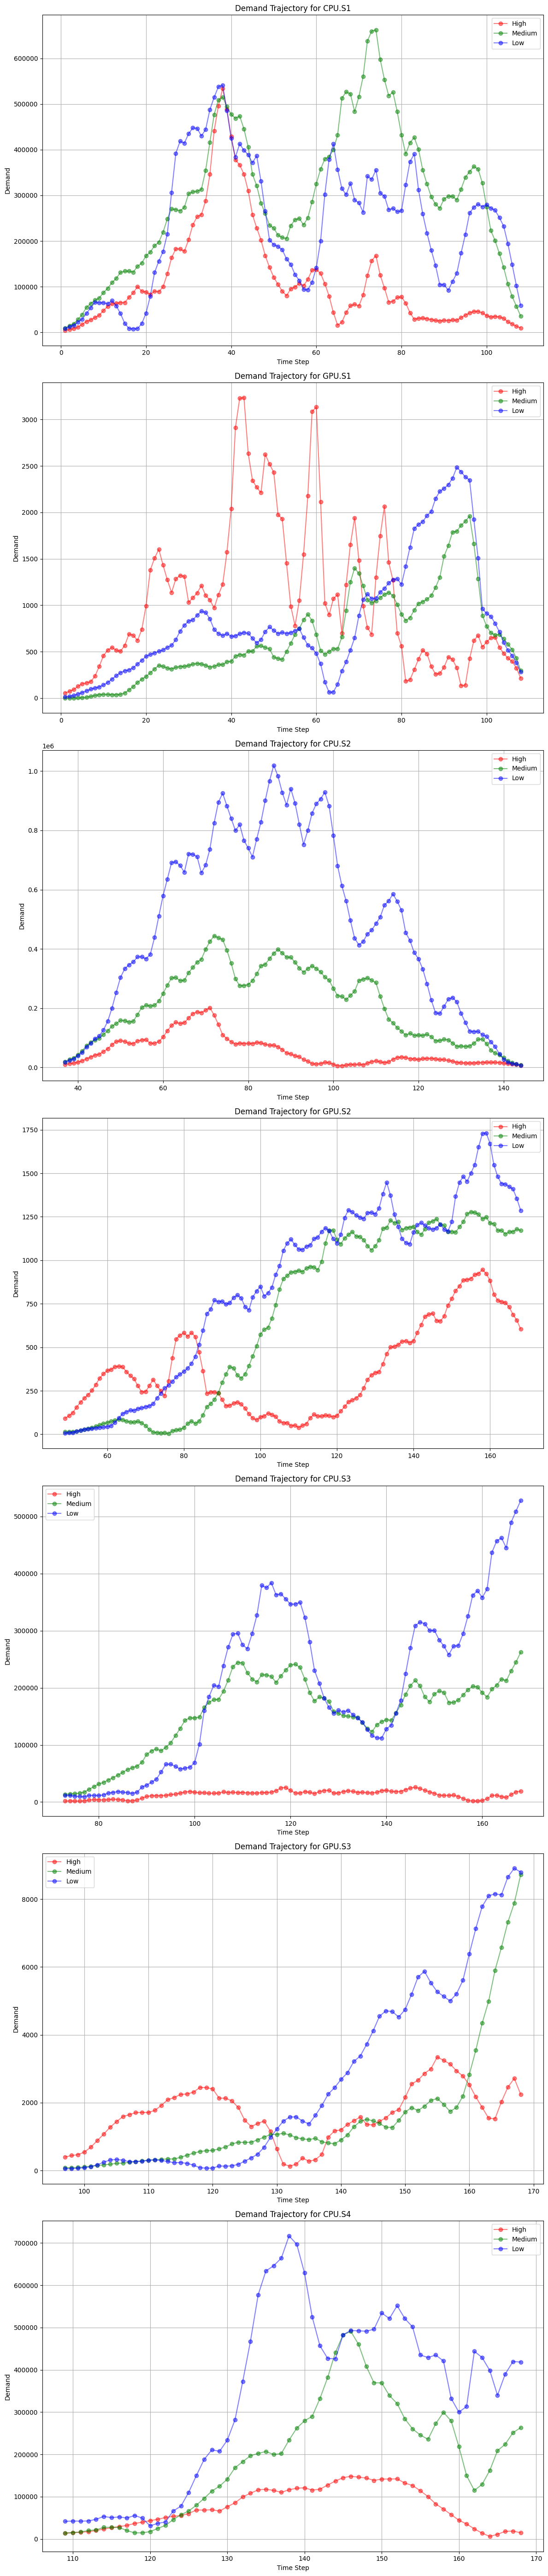

In [159]:
import matplotlib.pyplot as plt

server_generations = ma_df['server_generation'].unique()

# Create subplots vertically
fig, axes = plt.subplots(len(server_generations), 1, figsize=(12, 8 * len(server_generations)))
plt.subplots_adjust(left=0.2)  # Make room for check buttons

# if len(server_generations) == 1:
#     axes = [axes]

colors = {'high': 'red', 'medium': 'green', 'low': 'blue'}

# Plot for each server generation
for i, generation in enumerate(server_generations):
    df_gen = ma_df[ma_df['server_generation'] == generation]
    
    ax = axes[i]
    
    for column in ['high', 'medium', 'low']:
        color = colors[column]
        
        # Plot original data
        ax.plot(df_gen['time_step'], df_gen[column], label=f'{column.capitalize()}', 
                color=color, marker='o', alpha=0.5)
        
        # Calculate and plot moving average
        # moving_avg = df_gen[column].rolling(window=3, center=True, min_periods=1).mean()
        # ax.plot(df_gen['time_step'], moving_avg, label=f'{column.capitalize()} MA', 
                # color=f'dark{color}', linestyle='-', linewidth=2)
    
    ax.set_title(f'Demand Trajectory for {generation}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Demand')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()